In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.utils.readoutnc

In [3]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/data/readout/2016-01-30_142449_dark.nc')

In [4]:
rnc.sweeps

In [5]:
ts = rnc.timestreams[-1]

In [6]:
d = ts.data[:]

In [7]:
d.shape

(16, 524288)

In [9]:
dn = d.T - d.mean(1)

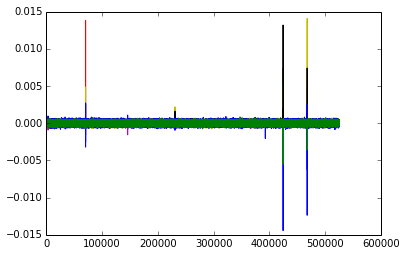

In [10]:
plot(dn.real)

In [12]:
idx = np.abs(dn.real)[:,0].argmax()

In [30]:
ss = d.T[idx-20:idx+20,:]

In [31]:
ss.shape

(40, 16)

In [32]:
ss = ss - ss.mean(0)

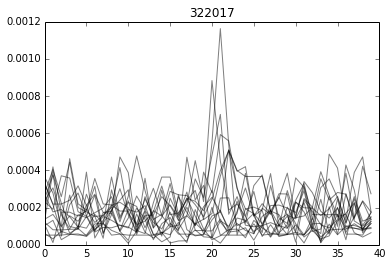

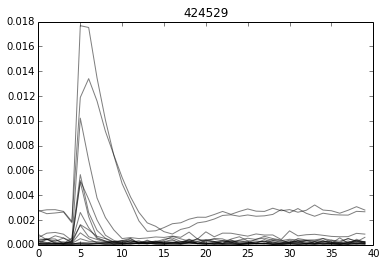

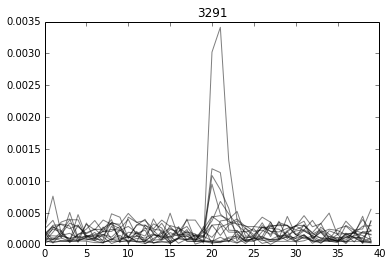

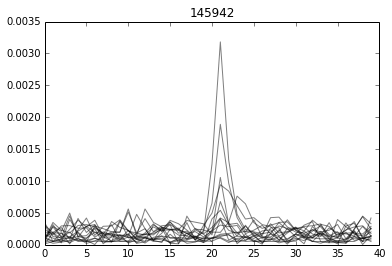

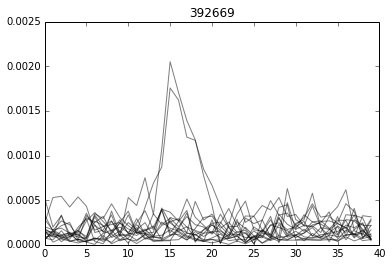

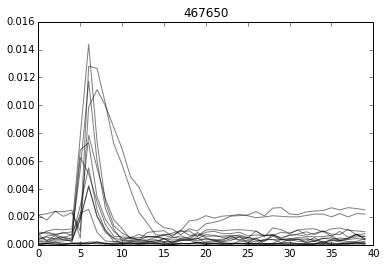

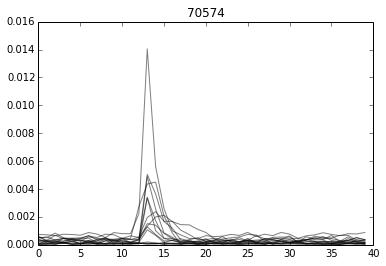

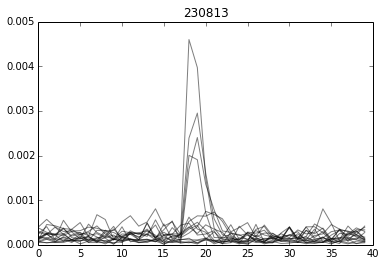

In [49]:
idxs = np.abs(dn.real).max(1).argsort()[-55:]
done = []
for idx in idxs:
    skip = False
    for doneidx in done:
        if skip or np.abs(doneidx - idx) <20:
            skip = True
    if skip:
        continue
    done.append(idx)
    ss = d.T[idx-20:idx+20,:]
    ss = ss - ss.mean(0)
    figure()
    plot(np.abs(ss),'k',alpha=0.5)
    title(idx)
#ylim(0,2e-3)

In [28]:
np.abs(ss).argmax(0)

array([20, 19, 19, 19, 19, 19, 19, 19, 13, 32, 23, 54, 11, 19, 17, 19])